In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
dt=pd.read_csv("Mall_Customers.csv")
print("Data Read!")

Data Read!


In [2]:
dt.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# Check for missing values in the dataset
print(dt.isnull().sum())


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


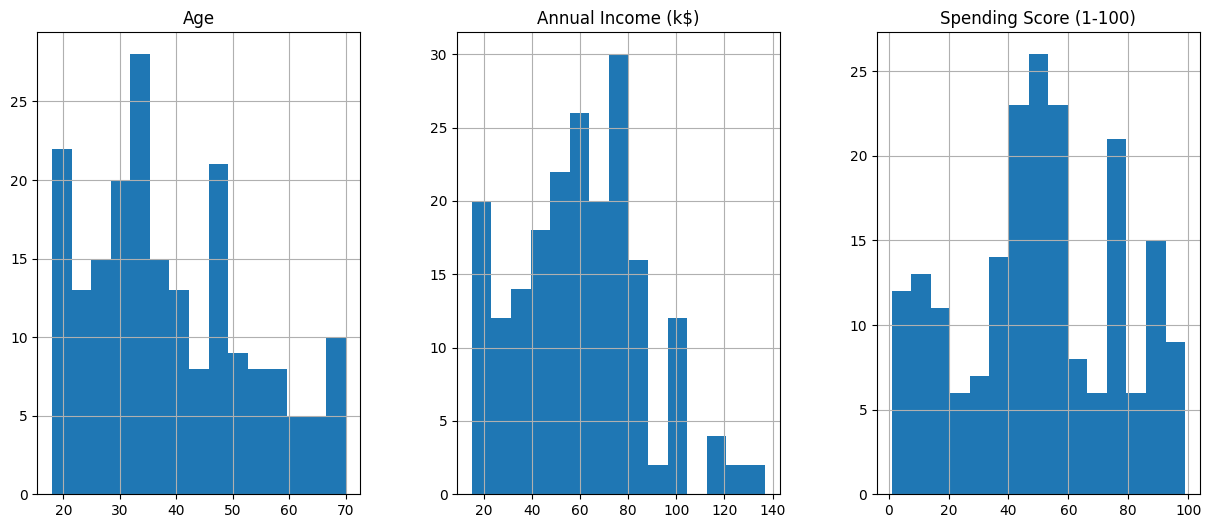

In [7]:


# Histograms for age, income and spending score
dt[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].hist(bins=15, figsize=(15, 6), layout=(1, 3))
plt.show()


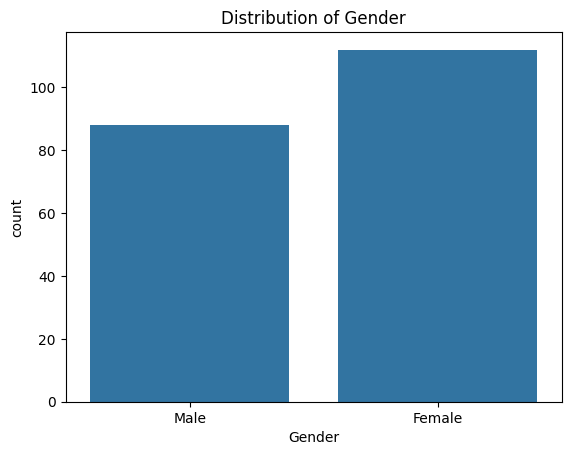

In [9]:
# Count plot for gender
sns.countplot(x='Gender', data=dt)
plt.title('Distribution of Gender')
plt.show()


In [11]:
dt['Gender'] = dt['Gender'].map({'Female': 0, 'Male': 1})

# Selecting relevant features for clustering:
X = dt[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


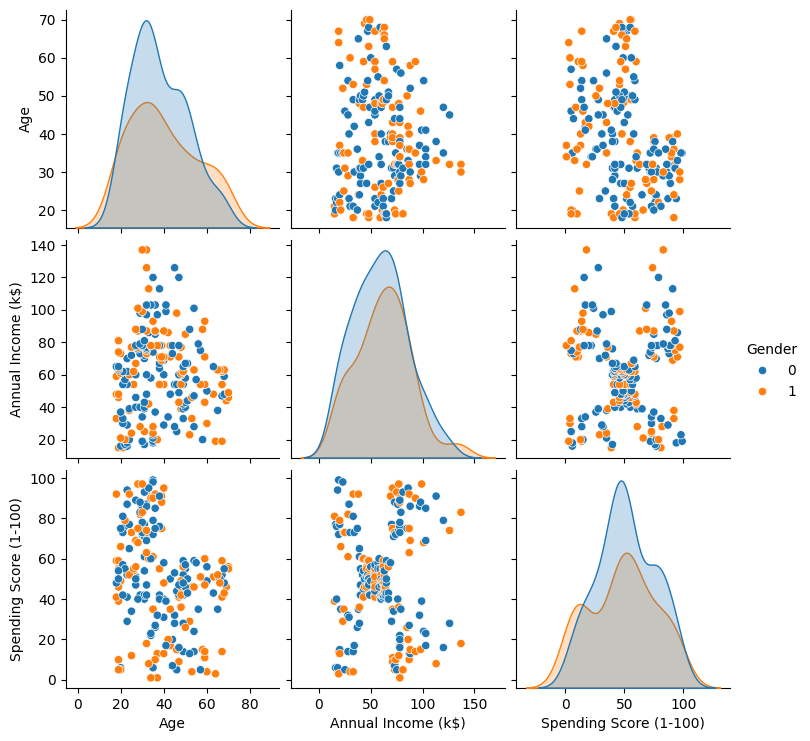

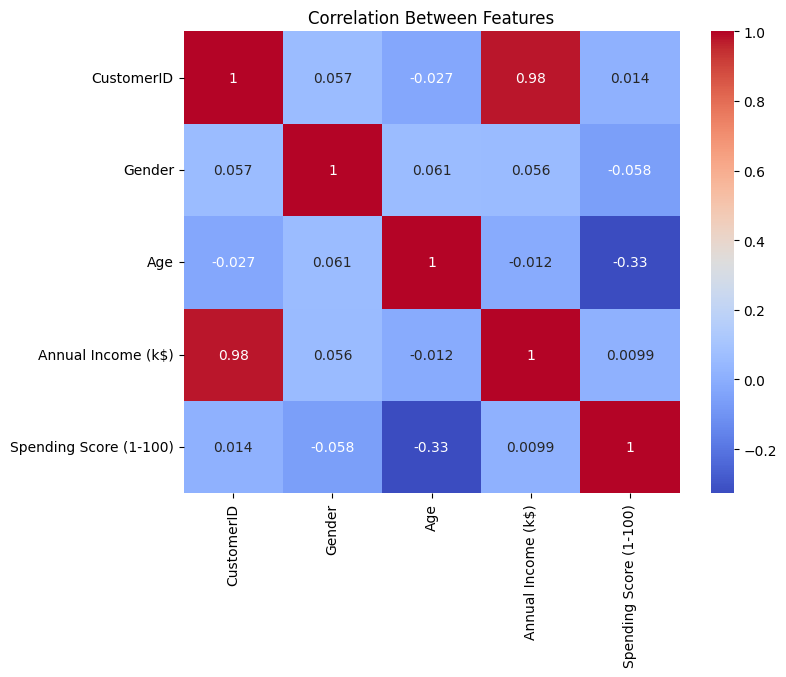

In [12]:
# Pairplot to visualize the relationships between Age, Annual Income, and Spending Score
sns.pairplot(dt, hue='Gender', vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
plt.show()

# Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(dt.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Features')
plt.show()


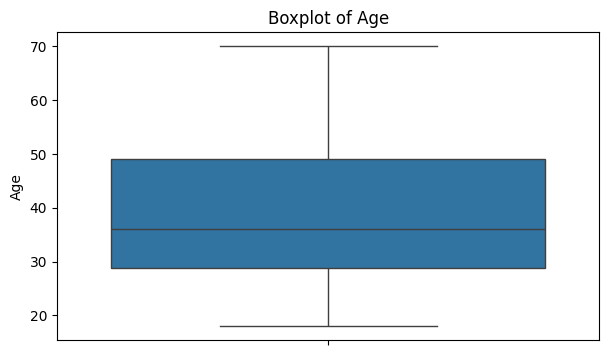

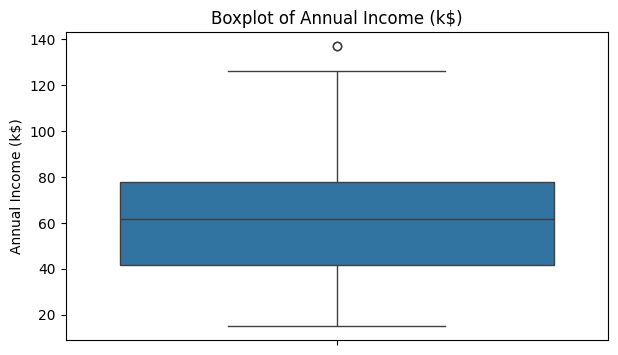

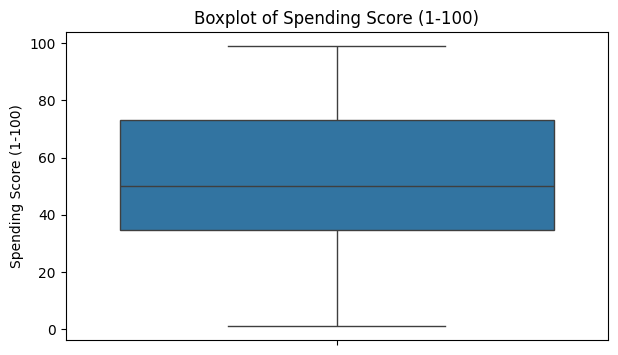

In [14]:
# Boxplots to check for outliers in the numerical columns
for column in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    plt.figure(figsize=(7, 4))
    sns.boxplot(dt[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


In [27]:

scaler = StandardScaler()
data_scaled = scaler.fit_transform(dt[['Annual Income (k$)', 'Spending Score (1-100)']])  # Scaling the features
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled)
dt['Cluster'] = clusters



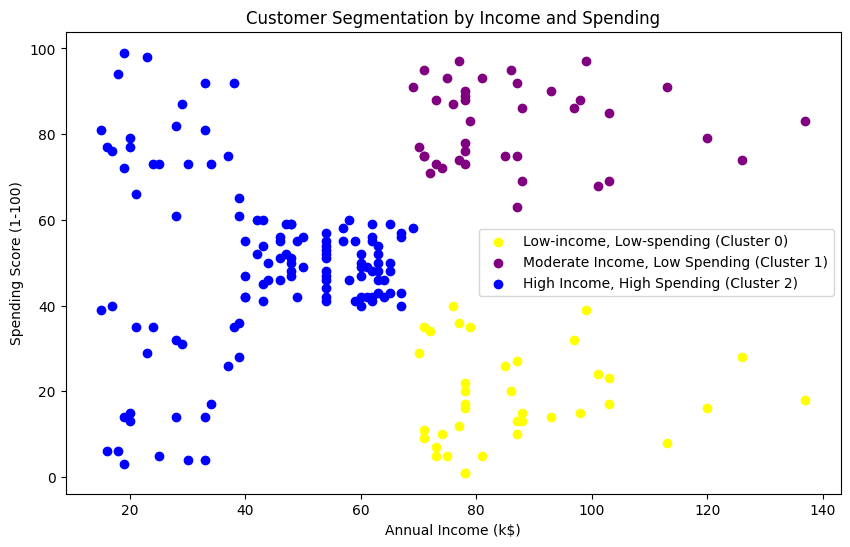

In [28]:
plt.figure(figsize=(10, 6))
for cluster_label, color, description in zip([0, 1, 2], ['yellow', 'purple', 'blue'], 
                                            ['Low-income, Low-spending', 'Moderate Income, Low Spending', 'High Income, High Spending']):
    # Filter data by cluster
    cluster_data = dt[dt['Cluster'] == cluster_label]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], 
                c=color, label=f'{description} (Cluster {cluster_label})')

plt.title('Customer Segmentation by Income and Spending')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [29]:
from sklearn.metrics import silhouette_score

#'data_scaled' is  scaled feature set and 'clusters' are the cluster labels from K-Means
score = silhouette_score(data_scaled, clusters)
print('Silhouette Score: {:.2f}'.format(score))


Silhouette Score: 0.47


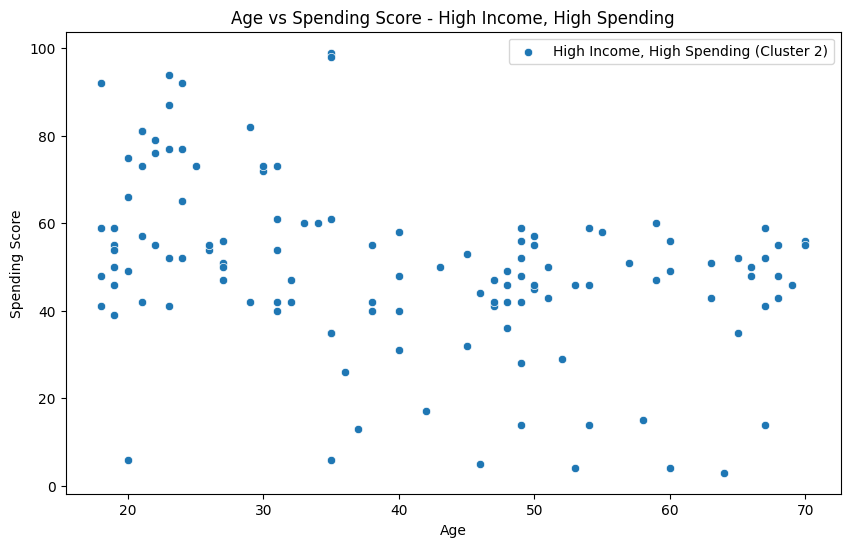

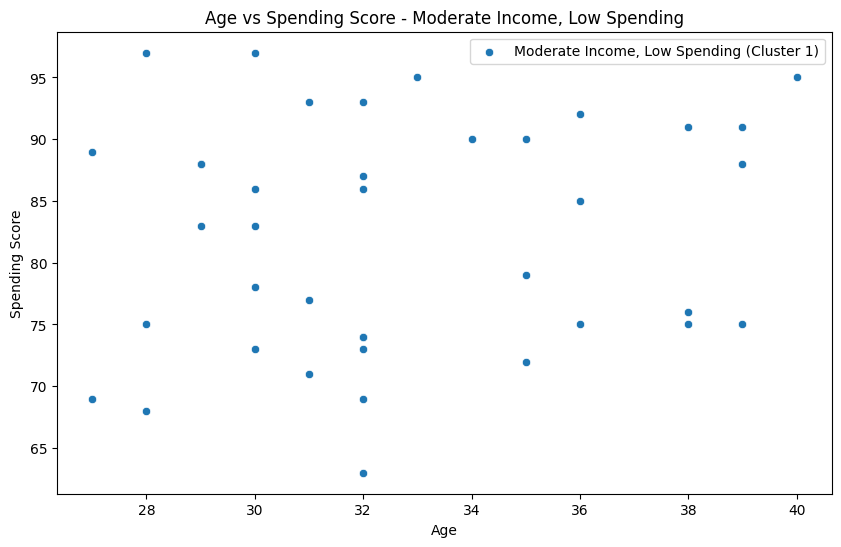

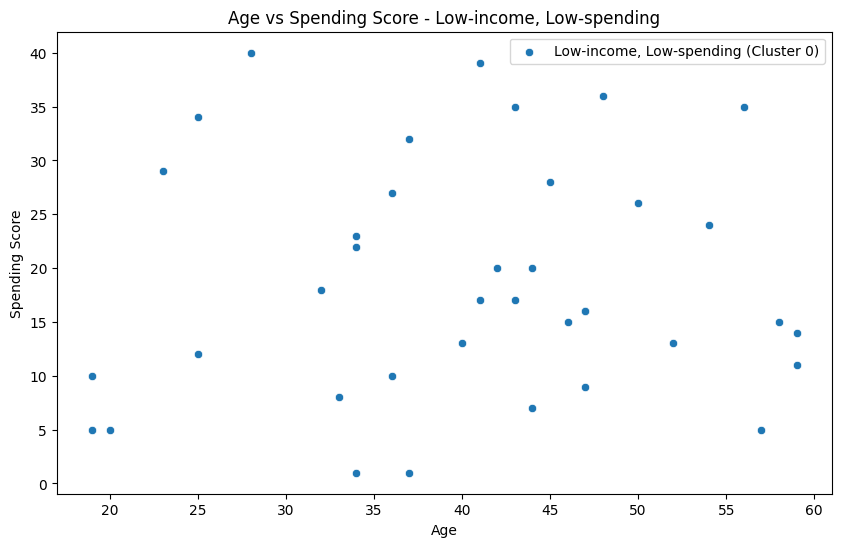

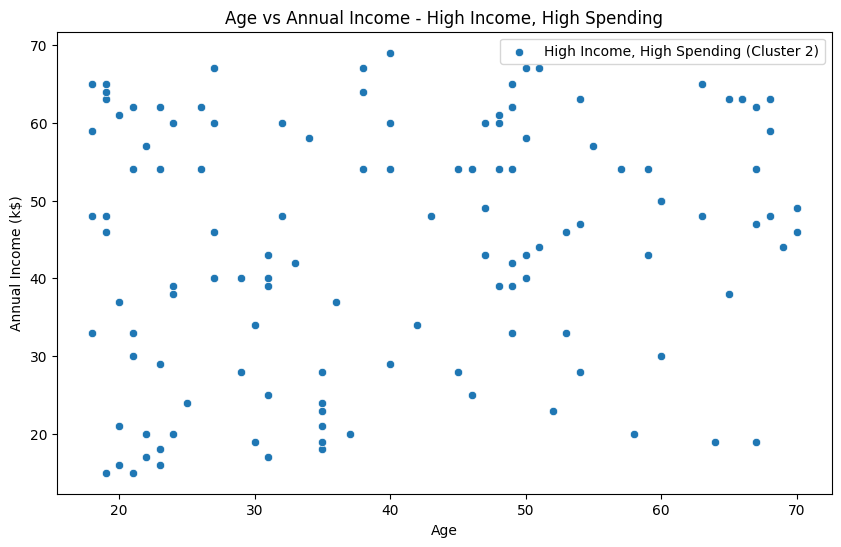

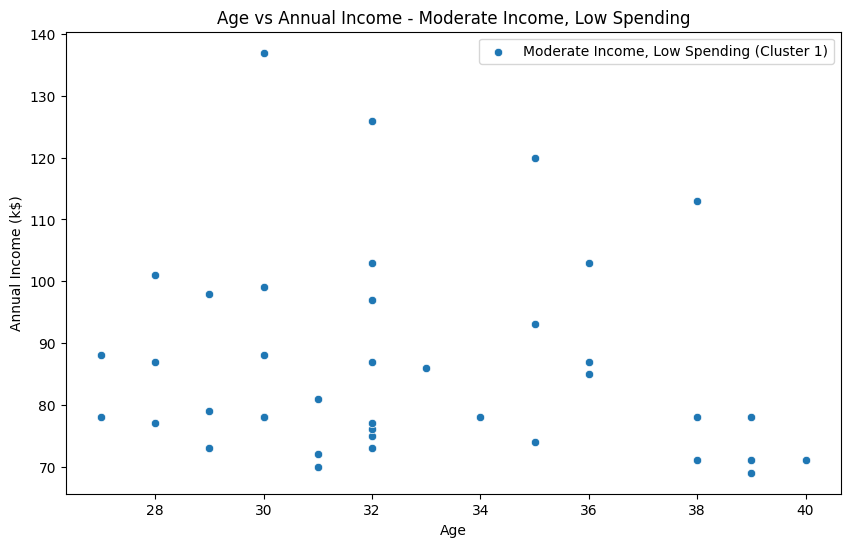

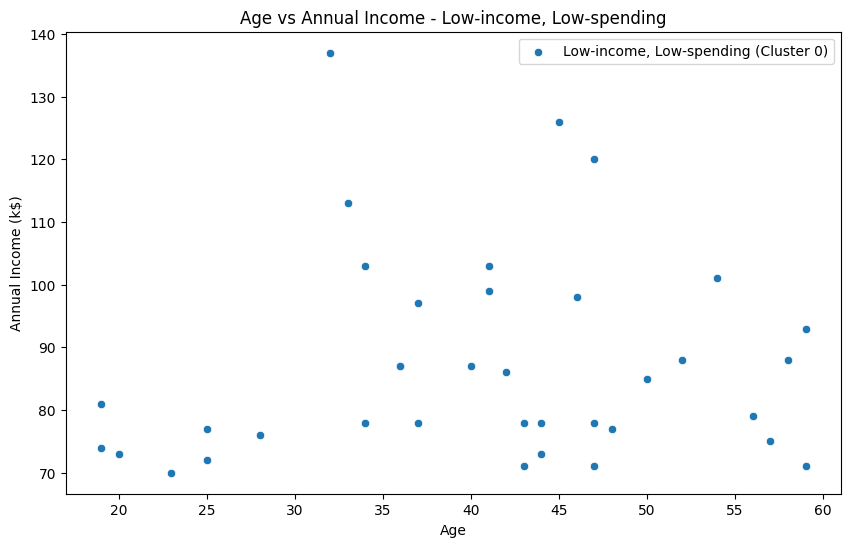

In [33]:
# Mapping of cluster labels to descriptions
cluster_descriptions = {
    0: 'Low-income, Low-spending',
    1: 'Moderate Income, Low Spending',
    2: 'High Income, High Spending'
}

# Plotting Age vs Spending Score for each cluster with descriptive labels
for cluster_label in dt['Cluster'].unique():
    cluster_data = dt[dt['Cluster'] == cluster_label]
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Age', y='Spending Score (1-100)', data=cluster_data, 
                    label=f'{cluster_descriptions[cluster_label]} (Cluster {cluster_label})')
    plt.title(f'Age vs Spending Score - {cluster_descriptions[cluster_label]}')
    plt.xlabel('Age')
    plt.ylabel('Spending Score')
    plt.legend()
    plt.show()

# Plotting Age vs Annual Income for each cluster with descriptive labels
for cluster_label in dt['Cluster'].unique():
    cluster_data = dt[dt['Cluster'] == cluster_label]
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Age', y='Annual Income (k$)', data=cluster_data, 
                    label=f'{cluster_descriptions[cluster_label]} (Cluster {cluster_label})')
    plt.title(f'Age vs Annual Income - {cluster_descriptions[cluster_label]}')
    plt.xlabel('Age')
    plt.ylabel('Annual Income (k$)')
    plt.legend()
    plt.show()


In [32]:
import numpy as np

def predict_customer_cluster(features, scaler, model):
    # Scale the features
    scaled_features = scaler.transform([features])
    
    # Predict the cluster
    cluster = model.predict(scaled_features)
    
    # Calculate the distance to the centroid of the cluster
    centroid = model.cluster_centers_[cluster[0]]
    dist = np.linalg.norm(scaled_features - centroid)
    
    # Calculate a simple confidence score
    # Assuming the maximum distance that matters is 3 standard deviations (a heuristic)
    max_dist = 3 
    confidence = max(0, 1 - dist / max_dist)
    
    return cluster[0], confidence

features = [70, 50]  # Example features: Annual Income (k$), Spending Score (1-100)
cluster_label, confidence = predict_customer_cluster(features, scaler, kmeans)
print(f'The customer belongs to cluster: {cluster_label} with confidence: {confidence:.2f}')


The customer belongs to cluster: 2 with confidence: 0.67


c:\Program Files\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
